In [1]:
import numpy as np
import pandas as pd

# Preprocessing

In [5]:
%%bash

ls

L11.ipynb
owid-covid-data.csv


In [6]:
covid = pd.read_csv("owid-covid-data.csv", sep=",")

In [10]:
covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'],
      dtype='object')

In [14]:
X_raw = covid[covid["location"] == "Russia"]["total_deaths"].values

In [24]:
X_max = np.log(140000000)

In [26]:
X_pre = np.log(X_raw+10**-5)/X_max

In [27]:
X_pre[X_pre < 0] = 0

In [36]:
X_pre = X_pre[X_pre != 0]

In [37]:
np.log(0+10**-5)

-11.512925464970229

In [38]:
i = 0
X = []
Y = []
while i != X_pre.shape[0]-3:
    X.append(X_pre[i:i+3])
    Y.append(X_pre[i+3])
    i += 1

In [41]:
X = np.stack(X)
Y = np.array(Y)

In [39]:
for a,b in zip(X, Y):
    print(a, b)

[0.03695402 0.07390764 0.08580406] 0.11086132281549835
[0.07390764 0.08580406 0.11086132] 0.12275776048626832
[0.08580406 0.11086132 0.12275776] 0.15104711974283316
[0.11086132 0.12275776 0.15104712] 0.16943158966107358
[0.12275776 0.15104712 0.16943159] 0.18132803621732935
[0.15104712 0.16943159 0.18132804] 0.1880008561206463
[0.16943159 0.18132804 0.18800086] 0.2005208547452312
[0.18132804 0.18800086 0.20052085] 0.20294458950859995
[0.18800086 0.20052085 0.20294459] 0.20526291055276444
[0.20052085 0.20294459 0.20526291] 0.21647438644689415
[0.20294459 0.20526291 0.21647439] 0.22088292873724727
[0.20526291 0.21647439 0.22088293] 0.23088437122363542
[0.21647439 0.22088293 0.23088437] 0.242216656939269
[0.22088293 0.23088437 0.24221666] 0.24862190937406756
[0.23088437 0.24221666 0.24862191] 0.2595028431244266
[0.24221666 0.24862191 0.25950284] 0.2664163557501075
[0.24862191 0.25950284 0.26641636] 0.2738047986916158
[0.25950284 0.26641636 0.2738048 ] 0.28193335559381216
[0.26641636 0.273

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
model.coef_

array([-0.25788106,  0.5684497 ,  0.60314137])

In [55]:
model.intercept_

0.02696576178435875

In [56]:
model.predict(X_test)

array([0.28395195, 0.26234862, 0.27663219, 0.27105192, 0.15926111])

In [57]:
Y_test

array([0.29038188, 0.26641636, 0.28193336, 0.2738048 , 0.16943159])

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mean_absolute_error(Y_test, model.predict(X_test))

0.0057444379020843315

In [60]:
mean_squared_error(Y_test, model.predict(X_test))

3.9401974590908136e-05

In [61]:
import matplotlib.pyplot as plt

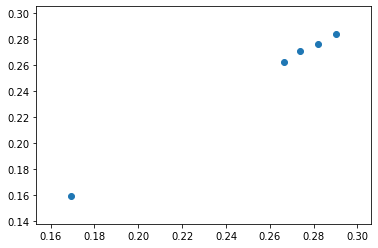

In [62]:
plt.scatter(Y_test, model.predict(X_test))

In [63]:
X[-1]

array([0.26641636, 0.2738048 , 0.28193336])

In [64]:
Y[-1]

0.2903818836691708

In [67]:
np.exp(
    model.predict([[ 0.2738048 , 0.28193336, 0.2903818836691708]])*X_max
)

array([238.08846121])

In [70]:
from sklearn.linear_model import LogisticRegression